# Projeto para reconhecimento do estágio de desenvolvimento de Culturas de Soja

Esse projeto foi desenvolvido para disciplina de Deep Learning, e o objetivo é utilizar o TensorFlow/Keras para reconhecer o estágio de desenvolvimento de plantações de soja, tomando como base um conjunto de imagens ilustrativas fornecidas pela Bayer. A maior parte do código foi baseada no vídeo que se encontra no link: https://www.youtube.com/watch?v=jztwpsIzEGc

# 0. Criando a base de validação

In [3]:
# Caminhos para as pastas de treino e teste
import os

train_dir = os.path.join('data', 'TRN')
test_dir = os.path.join('data', 'TST')

In [4]:
val_dir = os.path.join('data', 'VAL')
os.makedirs(val_dir, exist_ok=True)

for i in range(1,9):
    os.makedirs(os.path.join(val_dir, str(i)), exist_ok=True)

In [5]:
files_train = os.listdir(os.path.join(train_dir, '1'));
len(files_train)

1312

In [6]:
files_test = os.listdir(os.path.join(test_dir, '1'));
len(files_test)

657

In [7]:
files_val = os.listdir(os.path.join(val_dir, '1'));
len(files_val)

761

In [8]:
length_files_train = len(files_train)
length_files_teste = len(files_test)
length_files_val = len(files_val)

In [9]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(train_dir, str(i))))
    print(f'TRN/{i} : {size}')

TRN/1 : 1312
TRN/2 : 1312
TRN/3 : 1312
TRN/4 : 1312
TRN/5 : 1312
TRN/6 : 1312
TRN/7 : 1312
TRN/8 : 1312


In [10]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(test_dir, str(i))))
    print(f'TST/{i} : {size}')

TST/1 : 657
TST/2 : 657
TST/3 : 657
TST/4 : 657
TST/5 : 657
TST/6 : 657
TST/7 : 657
TST/8 : 657


In [11]:
for i in range(1,9):
    size = len(os.listdir(os.path.join(val_dir, str(i))))
    print(f'VAL/{i} : {size}')

VAL/1 : 761
VAL/2 : 761
VAL/3 : 761
VAL/4 : 761
VAL/5 : 761
VAL/6 : 761
VAL/7 : 761
VAL/8 : 761


In [12]:
'''
import os
import shutil
import random

# Para cada categoria, pegar um número específico de imagens para validação
categories = os.listdir(train_dir)

for category in ['1', '2', '3', '4', '5', '6', '7', '8']:
    # Caminhos para as categorias de treino e teste
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    
    # Listar as imagens de cada categoria
    train_images = os.listdir(train_category_dir)
    test_images = os.listdir(test_category_dir)

    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste
    val_train_images = random.sample(train_images, int(0.1*length_files_train))
    val_test_images = random.sample(test_images, int(0.1*length_files_teste))

    # Embaralhar as imagens para garantir aleatoriedade
    val_images = val_train_images + val_test_images
    random.shuffle(val_images)

    # Criar a pasta de validação da categoria, se não existir
    val_category_dir = os.path.join(val_dir, category)
    os.makedirs(val_category_dir, exist_ok=True)

    # Mover as imagens de treino e teste para a pasta de validação
    for image in val_images:
        # Caminho completo da imagem
        if image in val_train_images:
            src = os.path.join(train_category_dir, image)
        else:
            src = os.path.join(test_category_dir, image)
        
        dst = os.path.join(val_category_dir, image)
        
        # Mover para a pasta de validação
        shutil.move(src, dst)

print("Conjunto de validação criado com sucesso!")
'''

'\nimport os\nimport shutil\nimport random\n\n# Para cada categoria, pegar um número específico de imagens para validação\ncategories = os.listdir(train_dir)\n\nfor category in [\'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\']:\n    # Caminhos para as categorias de treino e teste\n    train_category_dir = os.path.join(train_dir, category)\n    test_category_dir = os.path.join(test_dir, category)\n    \n    # Listar as imagens de cada categoria\n    train_images = os.listdir(train_category_dir)\n    test_images = os.listdir(test_category_dir)\n\n    # Pegar as 50 primeiras imagens de treino e 100 imagens de teste\n    val_train_images = random.sample(train_images, int(0.1*length_files_train))\n    val_test_images = random.sample(test_images, int(0.1*length_files_teste))\n\n    # Embaralhar as imagens para garantir aleatoriedade\n    val_images = val_train_images + val_test_images\n    random.shuffle(val_images)\n\n    # Criar a pasta de validação da categoria, se não existir\n   

# 1. Configurações Básicas

In [14]:
!pip install tensorflow opencv-python matplotlib

In [15]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-pro

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [18]:
tf.config.list_physical_devices('GPU') # Por enquanto, minha GPU não está sendo detectada. Vou tentar fazer sem mesmo

[]

# 2. Importando e tratando as imagens

In [20]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomHeight, RandomWidth, RandomContrast
from tensorflow.keras.utils import to_categorical
import cv2

data_dir = 'data' 

In [21]:
# Função personalizada para converter RGB para HSV e ajustar o contraste
def rgb_to_hsv(image, label):
    # Converter RGB para HSV
    hsv_image = tf.image.rgb_to_hsv(image)
    
    return hsv_image, label

In [22]:
import cv2
import numpy as np
import tensorflow as tf

def enhance(image, label, green_factor=2):
    return image, label


In [23]:
def preprocess_labels(image, label):
    label_one_hot = to_categorical(label, num_classes=8)
    return image, label_one_hot

In [24]:
# Função para normalizar a imagem (para a faixa [0, 1])
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar após ajuste de contraste
    return image, label

In [25]:
# Carregar os dados de treino
data_train = tf.keras.utils.image_dataset_from_directory(
    'data/TRN',
    image_size=(256, 256),  # Garante que as imagens sejam redimensionadas para 256x256
    batch_size=32
)

# Copiar o dataset original sem augmentação (se precisar para fins de comparação)
data_train_without_augmentation = data_train

# Definindo as camadas de Data Augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),            # Flip horizontal aleatório
    RandomRotation(0.4),                 # Rotação aleatória até 40% (0.4)
    RandomZoom(0.2),                     # Zoom aleatório de até 20%
    RandomWidth(0.2),                    # Variação aleatória na largura até 20%
    RandomHeight(0.2),                   # Variação aleatória na altura até 20%
    RandomContrast(0.2),                 # Variação no contraste até 20%
    tf.keras.layers.Resizing(256, 256),  # Garante que o tamanho seja restaurado para 256x256
])

# data_train = data_train.map(enhance)                                                                # Ajustar o contraste
data_train = data_train.map(normalize)                                                              # Normalizar depois do ajuste
data_train = data_train.map(lambda x, y: (data_augmentation(x, training=True), y))                  # Data augmentation
#data_train = data_train.shuffle(buffer_size=100, reshuffle_each_iteration=True)                     # Embaralhar os dados
data_train = data_train.cache()                                                                     # Cache de dados
data_train = data_train.map(preprocess_labels).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)  # OneHotEncoding e prefetch

Found 10496 files belonging to 8 classes.


In [26]:
# Definindo uma pipeline para importar as imagens (assim não precisam ser todas salvas em memória de uma vez)

data_test = tf.keras.utils.image_dataset_from_directory(
    'data/TST',
    image_size=(256, 256),
    batch_size=10
)

# Aplicando o pipeline no dataset de teste
#data_test = data_test.map(adjust_contrast)                                                       # Ajustando o contraste
data_test = data_test.map(normalize)                                                             # Normalizando a escala RGB após ajuste de contraste
# data_test = data_test.map(rgb_to_hsv)                                                          # Usando HSV ao invés de RGB (opcional)
data_test = data_test.cache()                                                                    # Cache de dados para otimização
data_test = data_test.map(preprocess_labels).prefetch(buffer_size=tf.data.experimental.AUTOTUNE) # OneHotEnconding e prefetch

Found 5256 files belonging to 8 classes.


In [27]:
data_val = tf.keras.utils.image_dataset_from_directory(
    'data/VAL',
    image_size=(256, 256),
    batch_size=32
)

# Aplicando o pipeline no dataset de validação
#data_val = data_val.map(adjust_contrast)                                                         # Ajustando o contraste
data_val = data_val.map(normalize)                                                               # Normalizando a escala RGB após ajuste de contraste
# data_val = data_val.map(rgb_to_hsv)                                                            # Usando HSV ao invés de RGB (opcional)
data_val = data_val.cache()                                                                      # Cache de dados
data_val = data_val.map(preprocess_labels).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)   # OneHotEncondig e prefetch

Found 6088 files belonging to 8 classes.


In [28]:
# Definindo um iterator para cada pipeline. 
# Esses objetos serão usados para "puxar" um batch novo de imagens para memória sempre que necessário

data_train_iterator = data_train.as_numpy_iterator()
data_test_iterator = data_test.as_numpy_iterator()
data_val_iterator = data_val.as_numpy_iterator()

In [29]:
batch_train = data_train_iterator.next()

In [30]:
print(f'Os valores estão entre {batch_train[0].min()} e {batch_train[0].max()}')

Os valores estão entre 0.0 e 1.093444585800171


In [31]:
# O batch é um tupla formada por uma lista de valores 
# (que são as imagens importadas em memória no formato de uma lista de listas com três elementos - cores BGR - do NumPy) 
# E uma lista de rótulos, que se referem a pasta (e futuramente, classificação) da imagem

# As cores estão no formato BGR porque esse é o padrão do NumPy, o que exige uma conversão posterior (geralmente)

print(batch_train[0]) # matrizes NumPy que representam as imagens

[[[[6.64537191e-01 5.87606370e-01 4.49149638e-01]
   [6.96295679e-01 6.25607908e-01 4.89555895e-01]
   [7.26012766e-01 6.58228874e-01 5.28869808e-01]
   ...
   [7.67121851e-01 6.64747715e-01 5.27801156e-01]
   [7.62791753e-01 6.59468055e-01 5.22476912e-01]
   [7.52605557e-01 6.47659898e-01 5.10766625e-01]]

  [[7.23692656e-01 6.54906809e-01 5.15975893e-01]
   [7.66486168e-01 7.05188096e-01 5.70579648e-01]
   [7.96132207e-01 7.38786399e-01 6.11935794e-01]
   ...
   [7.44379520e-01 6.39696479e-01 5.03125608e-01]
   [7.41910756e-01 6.34987712e-01 4.99131262e-01]
   [7.33294189e-01 6.24538958e-01 4.89281744e-01]]

  [[7.84494281e-01 7.25304484e-01 5.87895930e-01]
   [8.36845040e-01 7.86122024e-01 6.54349148e-01]
   [8.52101684e-01 8.05899441e-01 6.82632089e-01]
   ...
   [7.22367764e-01 6.15276992e-01 4.79654193e-01]
   [7.20849276e-01 6.10580921e-01 4.76500869e-01]
   [7.13117898e-01 6.01662159e-01 4.67882514e-01]]

  ...

  [[6.95247948e-01 5.94367564e-01 4.73324984e-01]
   [7.97697842e-

In [32]:
# rótulos que representam as categorias em OneHotEncoding 
# (ou seja, cada uma é uma lista com zeros e ums, que representa o número referente à categoria - de 0 7 - )

print(batch_train[1]) 

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


In [33]:
# Podemos converter os labels de OntHotEncondig para números normais, e ver as categorias de cada imagem do batch normalmente
# (lembrando que o batch tem 32 imagens, por isso 32 valores na lista)

one_hot_labels = batch_train[1]
class_labels = np.argmax(one_hot_labels, axis=1)
class_labels

array([0, 5, 6, 7, 1, 1, 4, 6, 7, 4, 5, 6, 0, 4, 2, 7, 6, 7, 5, 3, 2, 0,
       7, 5, 0, 0, 6, 7, 7, 7, 3, 4], dtype=int64)

In [34]:
len(batch_train[0]) # cada batch importa 32 imagens 

32

In [35]:
print(batch_train[0][0][0][0]) # um pixel (com as regularização, seus valores estarão entre 0 e 1)

[0.6645372  0.5876064  0.44914964]


In [36]:
print(255*batch_train[0][0][0][0]) # um pixel com os valores entre 0 e 255

[169.45699 149.83963 114.53316]


In [37]:
len(batch_train[0][0][0]) # uma linha de pixels da imagem

256

In [38]:
len(batch_train[0][0]) # uma lista de linhas - ou seja, a imagem

256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..256].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..257].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].


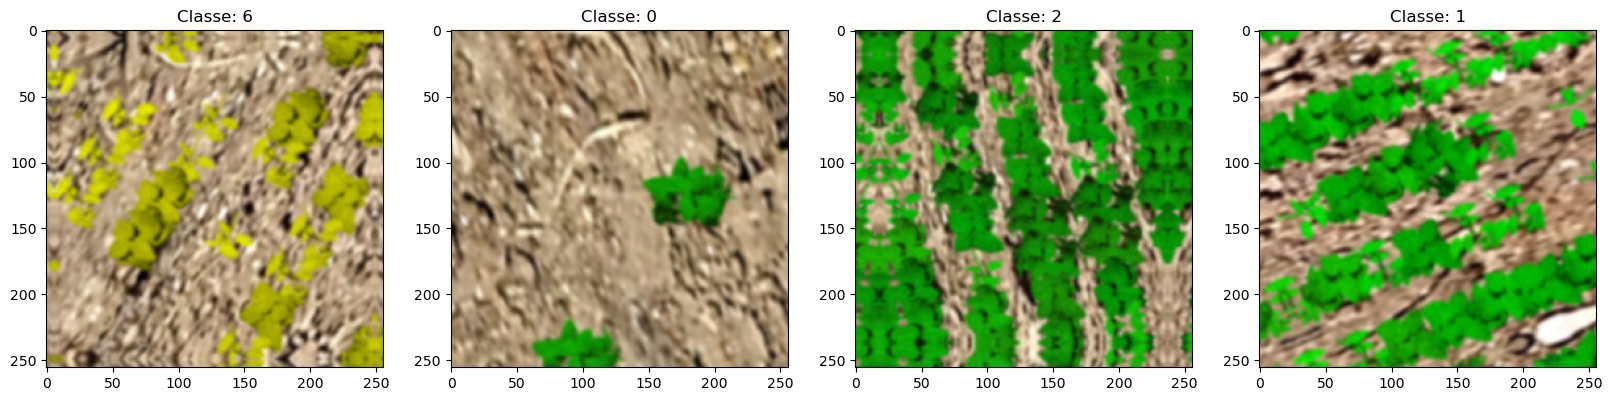

In [39]:
batch_train = data_train_iterator.next()

ig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_train[0][:4]):
    # Exibindo a imagem
    ax[idx].imshow((255*img).astype(int))
    
    # Convertendo One-Hot para número
    label_number = tf.argmax(batch_train[1][idx]).numpy()  # Converte a posição da classe para um número
    
    # Definindo o título com o número da classe
    ax[idx].title.set_text(f"Classe: {label_number}")

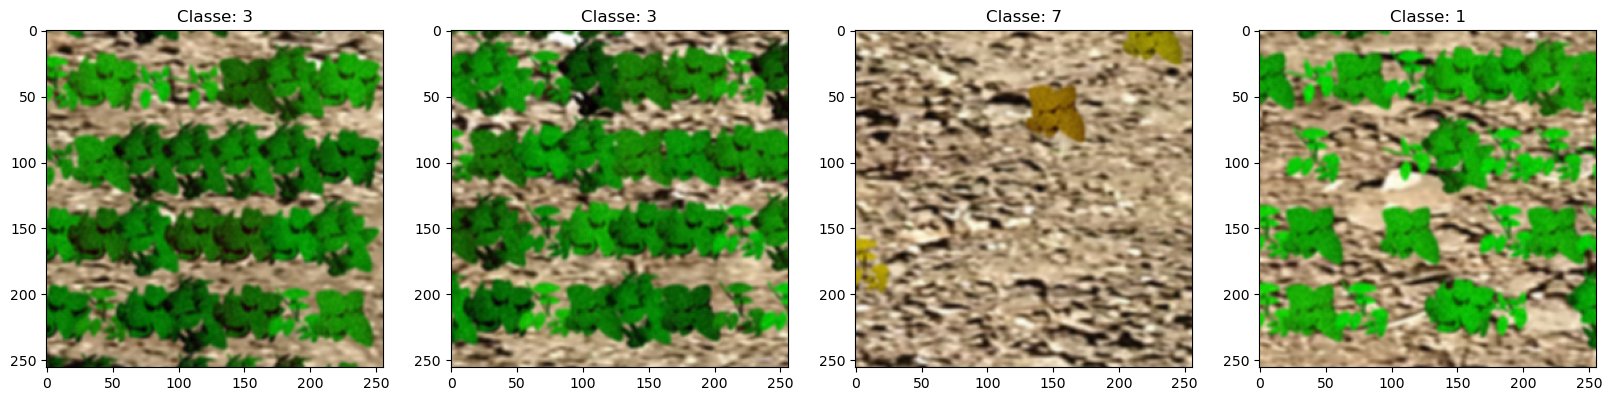

In [40]:
# Para comparação, vamos ver as imagens plotadas sem data augmentation

batch_without_augmentation = data_train_without_augmentation.map(lambda x,y: (x/255, y)).as_numpy_iterator().next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch_without_augmentation[0][:4]):
    ax[idx].imshow((255*img).astype(int))
    ax[idx].title.set_text(f"Classe: {batch_without_augmentation[1][idx]}")

# 3. Construindo o Modelo de Deep Learning

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation

In [43]:
# Arquitetura 2

'''
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(8, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25)) \n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25))  \n\nmodel.add(Conv2D(16, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.5))  \n\nmodel.add(Dense(8, activation='softmax'))\n"

In [44]:
# Arquitetura 3

'''
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(576, activation='relu'))

model.add(Dense(35, activation='relu')) 

model.add(Dense(70, activation='relu')) 

model.add(Dense(8, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(16, (3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(64, (3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(576, activation='relu'))\n\nmodel.add(Dense(35, activation='relu')) \n\nmodel.add(Dense(70, activation='relu')) \n\nmodel.add(Dense(8, activation='softmax'))\n"

In [45]:
# Arquitetura 4

'''

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.2))  

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(8, activation='softmax'))
'''

"\n\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(64, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\nmodel.add(Dropout(0.2))  \n\nmodel.add(Dense(128, activation='relu'))\n\nmodel.add(Dense(64, activation='relu'))\n\nmodel.add(Dense(8, activation='softmax'))\n"

In [46]:
# Arquitetura 5
'''
model = Sequential()

model.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=(256,256,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5), strides = (2,2)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(8))
model.add(Activation('softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (5, 5), strides = (2,2), padding='same', input_shape=(256,256,3)))\nmodel.add(Activation('relu'))\n\nmodel.add(Conv2D(32, (5, 5), strides = (2,2)))\nmodel.add(Activation('relu'))\n\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(512))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(256))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(8))\nmodel.add(Activation('softmax'))\n"

In [47]:
# Arquitetura 2 sendo reeutilizada com o conjunto de validação modificado
'''
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25)) 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(8, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(16, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25)) \n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.25))  \n\nmodel.add(Conv2D(16, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.5))  \n\nmodel.add(Dense(8, activation='softmax'))\n"

In [48]:
# Arquitetura 8

'''
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.1)) 

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))  

model.add(Conv2D(62, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  

model.add(Dense(8, activation='softmax'))
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(64, (3,3), input_shape=(256,256,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.1)) \n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Dropout(0.1))  \n\nmodel.add(Conv2D(62, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(32, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Conv2D(16, (3,3), activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\n\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.2))  \n\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dropout(0.2))  \n\nmodel.add(Dense(8, activation='softmax'))\n"

In [49]:
# Arquitetura 9

'''
# Definir a arquitetura da CNN
model = Sequential()

# Primeira camada convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # Tamanho da imagem 256x256 com 3 canais (RGB)
model.add(MaxPooling2D((2, 2)))

# Segunda camada convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Terceira camada convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Quarta camada convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Achatar para conectar a camada densa
model.add(Flatten())

# Camada totalmente conectada
model.add(Dense(512, activation='relu'))

# Camada de saída para 8 classes (softmax para classificação)
model.add(Dense(8, activation='softmax'))

# Exibir o resumo da arquitetura
model.summary()

'''

"\n# Definir a arquitetura da CNN\nmodel = Sequential()\n\n# Primeira camada convolucional\nmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # Tamanho da imagem 256x256 com 3 canais (RGB)\nmodel.add(MaxPooling2D((2, 2)))\n\n# Segunda camada convolucional\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Terceira camada convolucional\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Quarta camada convolucional\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\n\n# Achatar para conectar a camada densa\nmodel.add(Flatten())\n\n# Camada totalmente conectada\nmodel.add(Dense(512, activation='relu'))\n\n# Camada de saída para 8 classes (softmax para classificação)\nmodel.add(Dense(8, activation='softmax'))\n\n# Exibir o resumo da arquitetura\nmodel.summary()\n\n"

In [50]:
# Arquitetura 10

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.2))  

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(8, activation='softmax'))

C:\Dev\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=0.0001) 
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=1e-5)

model.compile(optimizer='adam', 
                loss=tf.losses.CategoricalCrossentropy(), 
                  metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,322,664 (12.67 MB)

 Trainable params: 3,322,664 (12.67 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Treinando o Modelo

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# colocando peso maior nas classes finais, que não estão sendo aprendidas
class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.5, 5: 1.5, 6: 1.5, 7: 1.5}

hist = model.fit(
    data_train,
    epochs=15,
    validation_data=data_val,
    class_weight=class_weights,
    callbacks=[tensorboard_callback, early_stopping]
)

Epoch 1/15
 26/328 ━━━━━━━━━━━━━━━━━━━━ 2:37 522ms/step - accuracy: 0.2150 - loss: 2.3293

KeyboardInterrupt: 

# 5. Estatísticas do Resultado

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in data_test.as_numpy_iterator():
    X, y = batch  # y é o vetor de rótulos com 32 categorias
    yhat = model.predict(X)  # yhat é um array de forma (32, 8), com as previsões de probabilidade
    
    # Converte as probabilidades para rótulos pegando o índice da maior probabilidade
    yhat_labels = tf.argmax(yhat, axis=1)  # yhat_labels será um vetor de rótulos, assim como y
    
    # Agora, atualize as métricas usando y e yhat_labels, que possuem a mesma forma
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# 6. Testando o Modelo diretamente

## Reconhecendo uma imagem de categoria 1

In [ ]:
import cv2

def showImage(path, category, model):
    img = cv2.imread(path)
    image = tf.image.resize(img, (256,256))
    image = tf.clip_by_value(image, 0.0, 255.0)
    image = tf.cast(image, tf.uint8)
    
    # Prever a classe da imagem
    yhat = model.predict(np.expand_dims(image / 255, 0))  
    predicted_class = np.argmax(yhat)  # A classe predita
    details = ""
    
    # Gerar as probabilidades para todas as classes
    for i, prediction in enumerate(yhat[0]):  
        details += f'Probability of Class {i + 1}: {prediction * 100:.2f}%\n'
    
    # Converter a imagem de BGR para RGB
    rgb_img = cv2.cvtColor(image.numpy(), cv2.COLOR_BGR2RGB)
    
    # Criar a figura e os eixos
    fig, ax = plt.subplots(figsize=(8, 8))  # Ajuste o tamanho da figura (largura x altura)
    
    # Exibir a imagem
    ax.imshow(rgb_img)
    
    # Título com a categoria
    ax.set_title(f"Classe: {category}\nPrevisão: {predicted_class + 1}", fontsize=14)
    
    # Adicionar as probabilidades das classes como rodapé
    fig.text(0.5, -0.05, details, ha='center', fontsize=10, color='gray', va='bottom')
    
    # Ajustar o layout para evitar sobreposição
    plt.tight_layout(pad=8.0)  # Aumente o valor de 'pad' para mais espaçamento
    
    # Exibir a imagem
    plt.show()

In [ ]:
showImage('test/test_category1.png', '1', model)

## Reconhecendo uma imagem de categoria 2

In [ ]:
showImage('test/test_category2.png', '2', model)

## Reconhecendo uma imagem de categoria 3

In [ ]:
showImage('test/test_category3.png', '3', model)

## Reconhecendo uma imagem de categoria 4

In [ ]:
showImage('test/test_category4.png', '4', model)

## Reconhecendo uma imagem de categoria 5

In [ ]:
showImage('test/test_category5.png', '5', model)

## Reconhecendo uma imagem de categoria 6

In [ ]:
showImage('test/test_category6.png', '6', model)

## Reconhecendo uma imagem de categoria 7

In [ ]:
showImage('test/test_category7.png', '7', model)

## Reconhecendo uma imagem de categoria 8

In [ ]:
showImage('test/test_category8.png', '8', model)

# 7. Salvando o modelo

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','SoyField10.h5'))

In [ ]:
model.save('models/SoyField10.keras')

In [ ]:
model = load_model(os.path.join('models', 'SoyField7.keras'))

# 8. Classificando uma imagem grande

In [75]:
import os
import cv2
import tensorflow as tf
import numpy as np

def getPrediction(path):
    img = cv2.imread(path)
    image = tf.image.resize(img, (256,256))
    image = tf.clip_by_value(image, 0.0, 255.0)
    image = tf.cast(image, tf.uint8)
    
    # Prever a classe da imagem
    yhat = model.predict(np.expand_dims(image / 255, 0))  
    predicted_class = np.argmax(yhat)
    return predicted_class

In [77]:
image_dir = os.path.join('complete', 'image8');

list_pred = {}
total = len(os.listdir(image_dir))

for i in range(1,9):
    list_pred[i] = 0

for imagePath in os.listdir(image_dir):
    pred = getPrediction(os.path.join(image_dir, imagePath))
    list_pred[pred+1] += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [79]:
print(list_pred)

{1: 101, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 31}


In [81]:
if (list_pred[6] + list_pred[7] > total*0.7) & (list_pred[6] < total*0.6):
    print("A plantação está no ponto adequado para desseca")
else:
    print("Ainda não é hora da desseca")

Ainda não é hora da desseca
